In [74]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
class UCBModel:
    def __init__(self, processSpace, upperBound, explorationFactor):
        self.processSpace = processSpace
        self.upperBound = upperBound
        self.explorationFactor = explorationFactor
        self.decisionTime = 0 
        self.visitList = np.ones(self.processSpace) # count visits to each machines
        self.totalCost = 0
        self.costMat = [] #store all the costs for every decisions        
        self.costAveList = np.zeros(self.processSpace)
    
    def rewardSim(self,candidates):
        costList = np.zeros(self.processSpace)
        for i in candidates:
            costList[i] = np.random.normal(i+1,i+1,1)
        self.costMat.append(costList)
        
    def initStep(self):
        self.rewardSim(range(self.processSpace))
        self.choice = self.costMat[-1].argmax()
        self.costAveList = self.costMat[-1]
        self.visitList[self.choice] += 1
        self.decisionTime += 10
        self.totalCost += self.costMat[-1][self.choice]
        self.costAveList = self.costMat[0]

    def samplingStep(self):
        self.decisionTime += 1
        e = self.upperBound*np.sqrt(self.explorationFactor*np.log(self.decisionTime)/self.visitList)
        self.choice = np.argmax(self.costAveList+e)
        self.visitList[self.choice] += 1
        costList = np.zeros(self.processSpace)
        costList[self.choice] = np.random.normal(self.choice+1,self.choice+1,1)
        self.costMat.append(costList)
        summedCost = np.sum(np.array(self.costMat),0)
        self.costAveList = summedCost/self.visitList     
        
    def visitBoundCalculation(self):
        b1 = 4*(self.upperBound**2)/((self.processSpace-np.arange(self.processSpace)-1)**2)
        b2 = self.explorationFactor*np.log(self.decisionTime)
        b3 = 3/2+1/2/(self.explorationFactor-1)
        self.visitBound = b1*b2+b3

[   4.    4.    3.    7.    6.   16.   18.   24.   22.  907.]
119.647886541


<Container object of 10 artists>

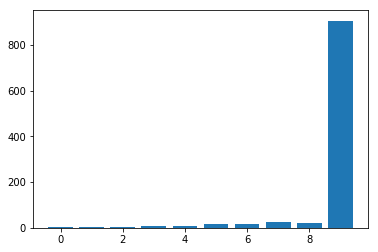

In [122]:
iterNum = 1000
ucbModel = UCBModel(10,1,50)
ucbModel.initStep()
for i in range(1000):
    ucbModel.samplingStep()
print(ucbModel.visitList)
regret = ucbModel.decisionTime*10-np.sum(np.array(ucbModel.costMat))
print(regret)
plt.bar(range(ucbModel.processSpace),ucbModel.visitList)

In [123]:
ucbModel.visitBoundCalculation()
print(ucbModel.visitBound-ucbModel.visitList)

[   14.59095867    19.12803411    26.74573718    32.94190191    50.85184896
    71.9815242    137.23699541   323.39548457  1363.05132605            inf]


/Users/Ricardo/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in true_divide
